In [1]:
import os
!pip3 install tensorflow
!pip install --upgrade seaborn statsmodels

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
# Verifica el nombre del dispositivo GPU disponible
# Si TensorFlow detecta una GPU, imprimirá el nombre del dispositivo.
# Si no se detecta ninguna GPU, la salida será una cadena vacía.
print(tf.test.gpu_device_name())

In [3]:
from tensorflow.python.client import device_lib
# Lista todos los dispositivos locales disponibles en TensorFlow
# Esto incluye CPUs y GPUs (si están disponibles y correctamente configuradas).
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10100430720293038128
xla_global_id: -1
]


In [4]:
from google.colab import drive
import os

# Montar Google Drive
drive.mount('/content/drive')

# Cambiar al directorio donde se encuentra el dataset
dataset_path = '/content/drive/My Drive/ESPECIALITZACIÓ/IA/PROYECTOS/Proyecto2/Elementos'
os.listdir(dataset_path)  # Verifica los archivos en el directorio

Mounted at /content/drive


['readme.md',
 'Lexique - Data Analyst.xlsx',
 'extract - cash request - data analyst.csv',
 'extract - fees - data analyst - .csv']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten
from tensorflow.keras.optimizers import RMSprop

# Cargar el dataset de imágenes desde ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ruta del dataset (reemplaza 'dataset_path' con la ruta real de tus datos)
dataset_path = "/content/drive/MyDrive/Dataset celebs"

# Configuración del generador de datos
datagen = ImageDataGenerator(rescale=1.0/255)  # Normalización de las imágenes

# Cargar todas las imágenes y etiquetas desde el dataset
data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Tamaño de las imágenes
    batch_size=1000,        # Carga todas las imágenes en un batch (ajusta según tu dataset)
    class_mode="categorical",
    shuffle=True            # Baraja las imágenes
)

# Obtener las imágenes (X) y las etiquetas (y)
x_data, y_data = data.__next__()

# División del dataset en 80% entrenamiento y 20% prueba
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Verificar las formas de los datos
print(f"Conjunto de entrenamiento: {x_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba: {x_test.shape}, {y_test.shape}")

# Construcción del modelo
model = Sequential([
    Input(shape=(128, 128, 3)),  # Forma de las imágenes (128x128x3)
    Flatten(), # Add a Flatten layer to convert 3D image to 1D vector
    Dense(64, activation='relu'),  # Capa densa con 64 neuronas
    Dropout(0.1),  # Dropout para evitar sobreajuste
    Dense(32, activation='relu'),  # Otra capa densa
    Dropout(0.1),  # Otro dropout
    Dense(16, activation='relu'),  # Capa densa con 16 neuronas
    Dropout(0.1),  # Otro dropout
    Dense(y_train.shape[1], activation='softmax')  # Capa de salida con tantas neuronas como clases
])

# Compilar el modelo
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)

# Entrenamiento del modelo
history = model.fit(
    x_train, y_train,
    epochs=10,                # Ajusta el número de épocas según lo necesites
    batch_size=32,            # Tamaño del batch
    validation_data=(x_test, y_test),  # Validación con el conjunto de prueba
    verbose=1
)

Found 300 images belonging to 2 classes.
Conjunto de entrenamiento: (240, 128, 128, 3), (240, 2)
Conjunto de prueba: (60, 128, 128, 3), (60, 2)
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.4969 - loss: 7.4911 - val_accuracy: 0.7167 - val_loss: 2.2757
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.6874 - loss: 1.6758 - val_accuracy: 0.7167 - val_loss: 1.2320
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.6455 - loss: 1.3754 - val_accuracy: 0.5667 - val_loss: 0.6980
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.6565 - loss: 1.1616 - val_accuracy: 0.7167 - val_loss: 1.4637
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.6778 - loss: 0.8687 - val_accuracy: 0.7000 - val_loss: 1.2437
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6688 - loss: 1.2381 - val_accuracy: 0.6833 - val_loss: 0.6289
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6245 - loss: 1.1038 - val_accuracy: 0.8

In [ ]:
# Evaluar el modelo en el conjunto de prueba
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

Test loss: 0.7874823212623596
Test accuracy: 0.7166666388511658


Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,287,938 (16.36 MB)

 Trainable params: 4,287,938 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5392 - loss: 0.8579 - val_accuracy: 0.6667 - val_loss: 0.5906
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6810 - loss: 0.5747 - val_accuracy: 0.7167 - val_loss: 0.5407
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7202 - loss: 0.5033 - val_accuracy: 0.8833 - val_loss: 0.3678
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8771 - loss: 0.3590 - val_accuracy: 0.8667 - val_loss: 0.3044
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8847 - loss: 0.2828 - val_accuracy: 0.9167 - val_loss: 0.2346
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9445 - loss: 0.2059 - val_accuracy: 0.9333 - val_loss: 0.1477
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9522 - loss: 0.1618 - val_accuracy: 0.9667 - val_loss: 0.1450
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9757 - loss: 0.1177 - val_accuracy: 0.9667 - val_loss: 0.0968
Epoch 9/10
8/8 ━━━━

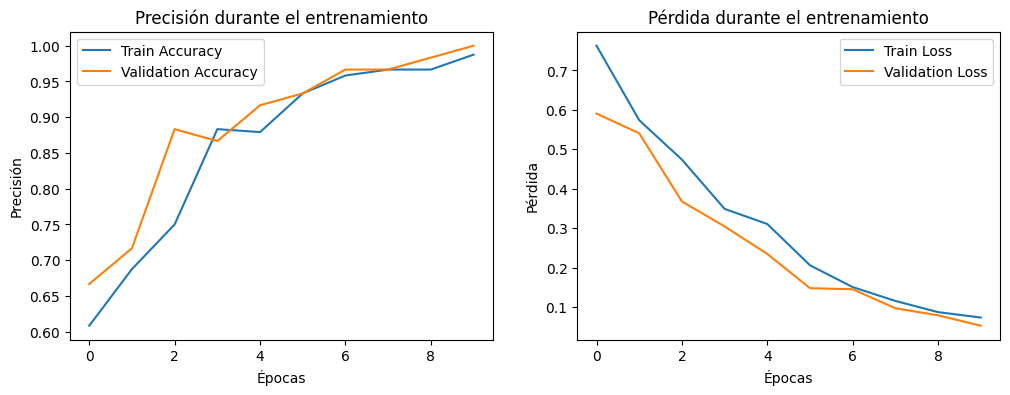

Modelo guardado como 'mi_modelo.h5'


In [ ]:
# Importar las librerías necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Configuración inicial
IMG_SIZE = (128, 128)  # Tamaño de las imágenes
BATCH_SIZE = 32  # Tamaño del batch
EPOCHS = 10  # Número de épocas

# 1. Cargar y preparar el dataset
# Cambia 'ruta_dataset' por la ruta donde está tu dataset
dataset_path = '/content/drive/MyDrive/Dataset celebs/'  # Asegúrate de que tiene subcarpetas por clase

# Crear generadores de datos con aumento
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalización
    validation_split=0.2,  # Separación entre entrenamiento y validación
)

# Generadores para entrenamiento y validación
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# 2. Crear la arquitectura de la red neuronal
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),  # Entrada de imágenes RGB
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),  # Aplanar la salida de las capas convolucionales
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularización para evitar sobreajuste
    layers.Dense(train_generator.num_classes, activation='softmax')  # Salida
])

# Mostrar un resumen del modelo
model.summary()

# 3. Compilar el modelo
model.compile(
    optimizer='adam',  # Optimizador
    loss='categorical_crossentropy',  # Función de pérdida para clasificación multiclase
    metrics=['accuracy']  # Métrica de evaluación
)

# 4. Entrenar el modelo
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    verbose=1
)

# 5. Evaluar el modelo
loss, accuracy = model.evaluate(validation_generator)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# 6. Visualizar los resultados de entrenamiento
plt.figure(figsize=(12, 4))
# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

# 7. Guardar el modelo
model.save('/content/mi_modelo.h5')
print("Modelo guardado como 'mi_modelo.h5'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


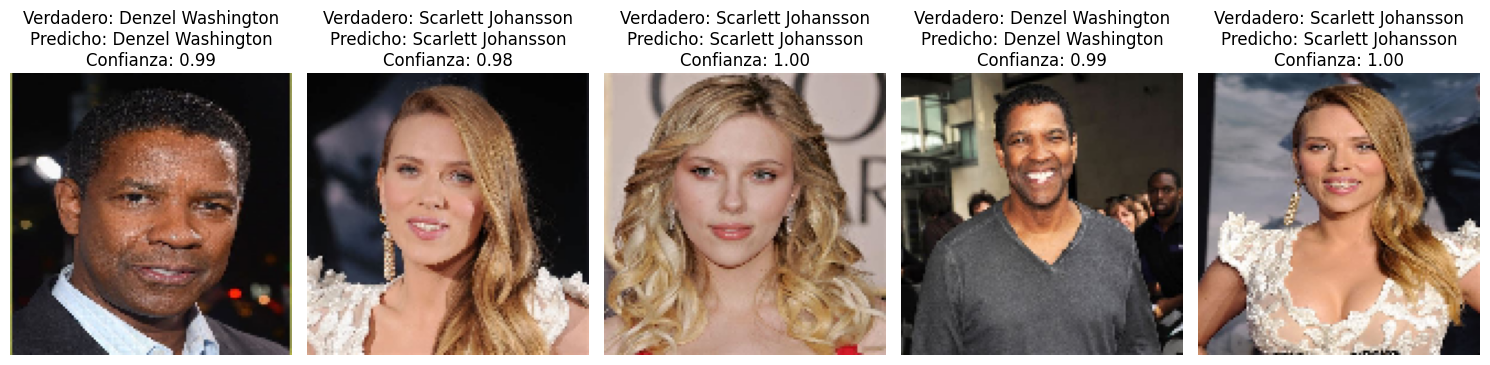

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener un batch de datos de validación
x_val, y_true = validation_generator.__next__()

# Obtener predicciones para las imágenes del batch
y_pred_probs = model.predict(x_val)  # Predicciones (probabilidades)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Clases predichas
y_true_classes = np.argmax(y_true, axis=1)  # Clases verdaderas

# Nombres de las clases
class_names = list(validation_generator.class_indices.keys())

# Mostrar imágenes con predicciones
num_images = min(5, len(x_val))  # Número de imágenes a mostrar
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_val[i])  # Mostrar imagen
    plt.axis('off')
    plt.title(f"Verdadero: {class_names[y_true_classes[i]]}\n"
              f"Predicho: {class_names[y_pred_classes[i]]}\n"
              f"Confianza: {y_pred_probs[i][y_pred_classes[i]]:.2f}")
plt.tight_layout()
plt.show()

## **2A VERSION**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener un batch completo de datos del generador de validación
x_val, y_true = validation_generator.__next__()

# Repetir hasta obtener al menos 100 imágenes
while len(x_val) < 100:
    x_batch, y_batch = validation_generator.__next__()
    x_val = np.concatenate([x_val, x_batch])
    y_true = np.concatenate([y_true, y_batch])

# Seleccionar las primeras 100 imágenes
x_val = x_val[:100]
y_true = y_true[:100]

# Calcular las predicciones del modelo
y_pred_probs = model.predict(x_val)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

# Nombres de las clases
class_names = list(validation_generator.class_indices.keys())

# Configurar la cuadrícula
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
fig.suptitle("Predicciones de la Red Neuronal (10 x 10)", fontsize=16)

# Mostrar cada imagen con su predicción
for i, ax in enumerate(axes.flat):
    ax.imshow(x_val[i])
    ax.axis('off')
    true_label = class_names[y_true_classes[i]]
    pred_label = class_names[y_pred_classes[i]]
    confidence = y_pred_probs[i][y_pred_classes[i]]
    ax.set_title(f"{true_label}\n{pred_label} ({confidence:.2f})", fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# **MATRIZ DE CONFUSION**

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


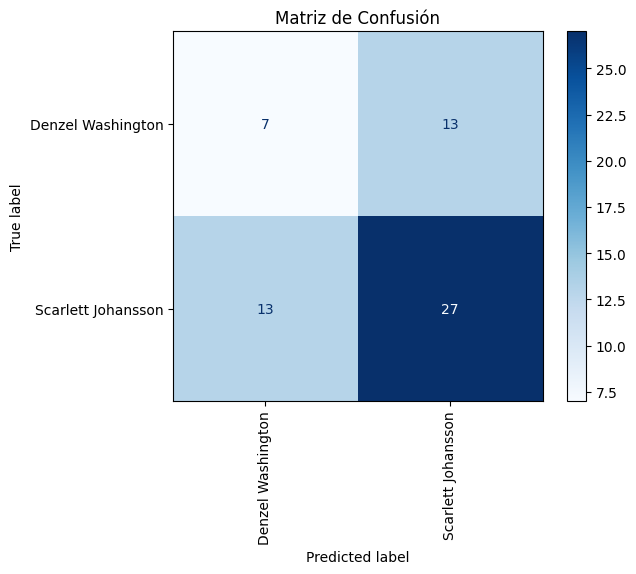

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo sobre el conjunto de validación
y_pred_probs = model.predict(validation_generator)  # Probabilidades predichas
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Clases predichas

# Obtener las etiquetas reales
y_true = validation_generator.classes  # Clases verdaderas del generador de validación

# Nombres de las clases (etiquetas)
class_names = list(validation_generator.class_indices.keys())

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Matriz de Confusión")
plt.show()

# **Reporte de clasificación**

In [ ]:
from sklearn.metrics import classification_report

# Generar el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=class_names)

# Mostrar el reporte en la consola
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
                    precision    recall  f1-score   support

 Denzel Washington       0.35      0.35      0.35        20
Scarlett Johansson       0.68      0.68      0.68        40

          accuracy                           0.57        60
         macro avg       0.51      0.51      0.51        60
      weighted avg       0.57      0.57      0.57        60



## **2A VERSION**

In [ ]:
from sklearn.metrics import classification_report

# Generar el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])

# Mostrar el reporte en consola
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.95      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.96      0.96      0.96       982
           5       0.96      0.92      0.94       892
           6       0.95      0.97      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.94      0.95      0.94       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

# Create a Sequential model
model = Sequential()

# Now you can add layers to the model
model.add(Dense(units=64, input_dim=100))
model.add(Activation("relu"))
model.add(Dense(units=10))
model.add(Activation("softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',
optimizer='sgd', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(loss='categorical_crossentropy',
optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

In [ ]:
classes = model.predict_classes(X_test, batch_size=32)
proba = model.predict_proba(X_test, batch_size=32)


AttributeError: 'Sequential' object has no attribute 'predict_classes'